In [1]:
import os
from scipy import signal
from thinkdsp import read_wave, CosSignal
from matplotlib import pyplot as plt

In [2]:
audiowave = read_wave('Ex3_sound4.wav')
audiowave.make_audio()

In [3]:
start = 0.0
duration = audiowave.duration
speech = audiowave.segment(start, duration)
spectrum = speech.make_spectrum()

## Calculate the sampling period and the sampling rate.

In [4]:
period_sampling = speech.ts[1]
rate_sampling = 1/period_sampling
print("Sampling Rate is:", rate_sampling)

band_width = spectrum.fs[-1]

Sampling Rate is: 48000.0


## Create unprocessed signal time/frequency domain graphs.

<Figure size 432x288 with 0 Axes>

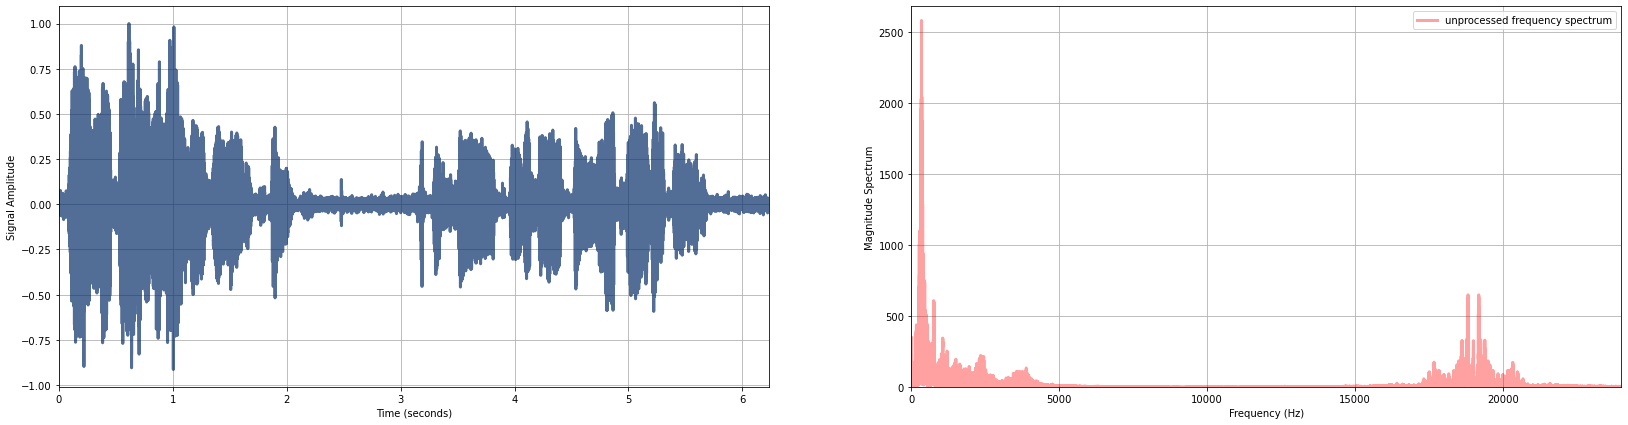

In [5]:
plt.clf()

FIGURE1_SIZE = 7
f, axes = plt.subplots(1, 2, figsize = (FIGURE1_SIZE*4, FIGURE1_SIZE))

plt.subplot(121)
speech.plot()
plt.xlim([0, speech.ts[-1]]);
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.grid()

plt.subplot(122)
spectrum.plot(color = 'r', alpha = 0.37, label = 'unprocessed frequency spectrum')
plt.legend()
plt.xlim([0, band_width])
plt.ylim([0, max(spectrum.amps + 100)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Spectrum')
plt.grid()

## Plot signals that are raw, carrier, remodulated, and lowpass filtered.

<Figure size 432x288 with 0 Axes>

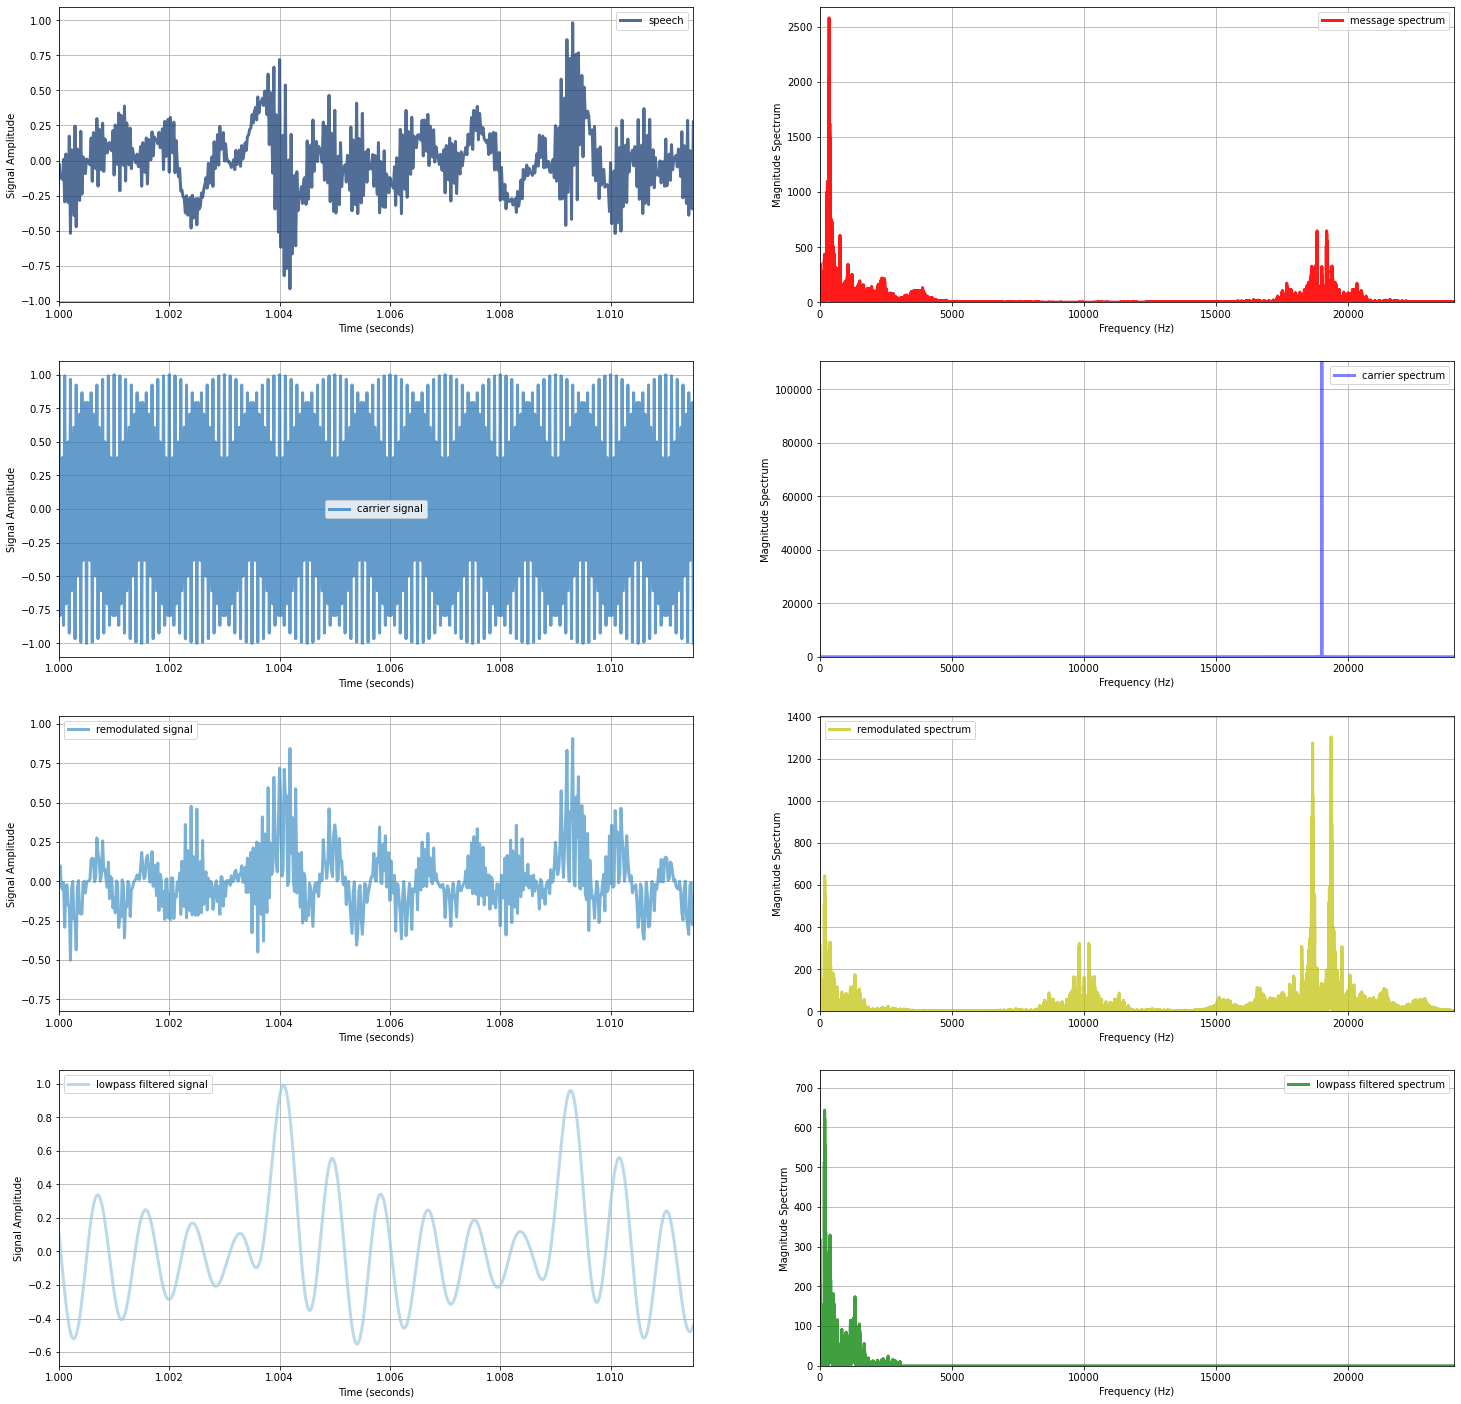

In [6]:
plt.clf()

cutoff = 3050
fc = 19000

FIGURE2_SIZE = 25
f2, axes2 = plt.subplots(4, 2, figsize = (FIGURE2_SIZE, FIGURE2_SIZE))

plot_length = 87

# this is to plot the speech signal
plt.subplot(421)
speech.plot(label = 'speech')
plt.legend()
plt.xlim([1, 1 + 1/plot_length]);
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.grid()

plt.subplot(422)
spectrum.plot(color = 'r', alpha = 0.9, label = 'message spectrum')
plt.legend()
plt.xlim([0, band_width])
plt.ylim([0, max(spectrum.amps + 100)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Spectrum')
plt.grid()

##################################################################################################

# this is to plot carrier signal
plt.subplot(423)
carrier = CosSignal(freq = fc, amp = 1.0, offset = 0)
carrier = carrier.make_wave(duration = speech.duration, start = 0, framerate = rate_sampling)
carrier.plot(label = 'carrier signal')
plt.legend()
plt.xlim([1, 1 + 1/plot_length]);
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.grid()

plt.subplot(424)
carrier_spectrum = carrier.make_spectrum()
carrier_spectrum.plot(color = 'b', alpha = 0.5, label = 'carrier spectrum')
plt.legend()
plt.xlim([0, carrier_spectrum.fs[-1]])
plt.ylim([0, max(carrier_spectrum.amps + 100)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Spectrum')
plt.grid()

##################################################################################################

# this is to plot remodulated signal
plt.subplot(425)
re_modulated = speech * carrier
re_modulated.plot(label = 'remodulated signal')
plt.legend()
plt.xlim([1, 1 + 1/plot_length]);
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.grid()

plt.subplot(426)
re_modulated_spectrum = re_modulated.make_spectrum()
re_modulated_spectrum.plot(color = 'y', alpha = 0.7, label = 'remodulated spectrum')
plt.legend()
plt.xlim([0, re_modulated_spectrum.fs[-1]])
plt.ylim([0, max(re_modulated_spectrum.amps + 100)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Spectrum')
plt.grid()

##################################################################################################

# this is to plot lowpass filter signal
plt.subplot(428)
re_modulated_spectrum.low_pass(cutoff)
re_modulated_spectrum.plot(color = 'g', alpha = 0.75, label = 'lowpass filtered spectrum')
plt.legend()
plt.xlim([0, re_modulated_spectrum.fs[-1]])
plt.ylim([0, max(re_modulated_spectrum.amps + 100)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Spectrum')
plt.grid()

plt.subplot(427)
filtered = re_modulated_spectrum.make_wave()
filtered.normalize()
filtered.plot(label = 'lowpass filtered signal')
plt.legend()
plt.xlim([1, 1 + 1/plot_length]);
plt.xlabel('Time (seconds)')
plt.ylabel('Signal Amplitude')
plt.grid()

# The four number secret code revealed!

In [7]:
filtered_part = filtered.segment(start, 7)
filtered_part.make_audio()

Four-number secret code is: 1891